In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Read data
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [28]:
#check that if we have any nan values in any columns
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [29]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [30]:
#since there is no null values so we dont need to do Eda 
#next aim is to remove unwanted column as per our requirement we can keep column 
df = df.drop(columns=['Unnamed: 0','year', 'month'],axis=1)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [33]:
#from here now we need to find the independent and dependent features 
# Independent features (all columns except the last one)
X = df.iloc[:, :-1]

# Dependent feature (last column)
y = df.iloc[:, -1]

In [34]:
#import models
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [36]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [12]:
y_train

15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [37]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [52]:
#perform standardscaling on the independent features only , on dependent features it is not required (why we do is in standerdization we are amking units same for all the feeatures)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)
X_train,X_test

(array([[-0.90115511,  0.37908503],
        [ 1.31077107, -1.48187786],
        [-0.90115511,  1.30956648],
        [ 1.31077107, -0.55139641],
        [ 1.31077107, -1.48187786],
        [-0.16384638,  0.68924552],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -1.48187786],
        [ 1.31077107, -1.17171738],
        [-0.90115511,  1.30956648],
        [-0.90115511,  0.999406  ],
        [-0.90115511,  0.37908503],
        [-0.90115511,  0.999406  ],
        [ 0.57346234, -0.8615569 ],
        [-0.16384638, -0.24123593],
        [-0.90115511,  0.06892455],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -0.8615569 ]]),
 array([[ 0.36115756, -0.82078268],
        [-1.08347268,  1.33377186],
        [ 1.8057878 , -1.43636969],
        [-1.08347268,  1.02597835],
        [-0.36115756,  0.41039134],
        [ 0.36115756, -0.51298918]]))

In [53]:
# work on model linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [56]:
## prediction
y_pred=regression.predict(X_test)

In [57]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [58]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


In [59]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [48]:
model.summary()

c:\Users\aryan.singh\OneDrive - ArcelorMittal\PersonalLearning\MachineLearning\Multiple Linear Regression\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Tue, 17 Jun 2025   Prob (F-statistic):                    7.46e-19
Time:                        14:09:07   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
interest_rate       569.9494     44.349     12.851      0.000     475.933     663.965
unemployment_rate   -20.5734     15.966     -1.289      0.216     -54.421      13.274
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.346
Skew:                          -0.611   Prob(JB):                        0.510
Kurtosis:                       2.451   Cond. No.                         14.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

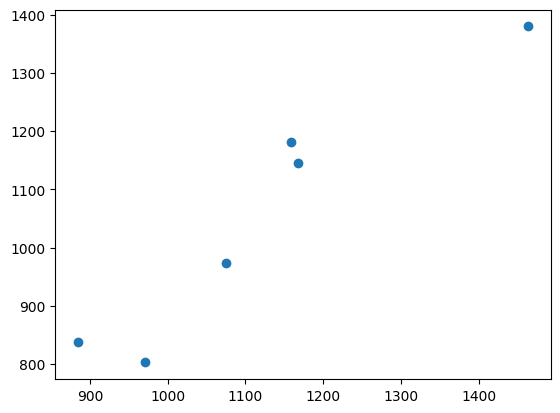

In [60]:
plt.scatter(y_test,y_pred)

In [61]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


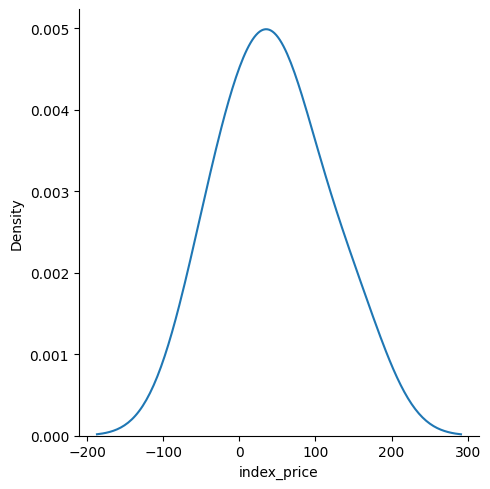

In [51]:
## Plot this residuals
sns.displot(residuals,kind='kde')